In [91]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

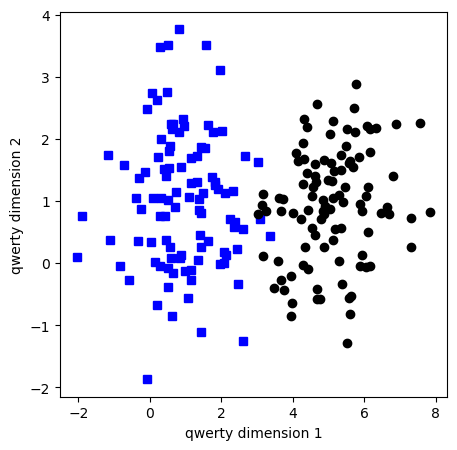

In [97]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [99]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),  
    nn.ReLU(),        
    nn.Linear(1,1), 
    nn.Sigmoid(),     
      )

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [101]:
learningRate = .01
lossfun = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  yHat = ANNclassify(data)

  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [103]:
predictions = ANNclassify(data)

predlabels = predictions>.5
misclassified = np.where(predlabels != labels)[0]

totalacc = 100-100*len(misclassified)/(2*nPerClust)
print('Final accuracy: %g%%' %totalacc)

Final accuracy: 94.5%
